<a href="https://colab.research.google.com/github/jerry26432341/myTheses/blob/main/pythonsklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas matplotlib jieba scikit-learn gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import jieba as jb
import re
from google.colab import drive


# 掛載Google Drive
drive.mount('/content/drive')

# 讀取CSV檔案
df = pd.read_csv('/content/drive/MyDrive/shopping.csv')
df=df[['cat','review']]
print("数据总量: %d ." % len(df))
df.sample(10)

Mounted at /content/drive
数据总量: 62774 .


,cat,review
12416,平板,我想问下我8月8日买的平板，里面怎么又7月15日的视频？请解释一下，有这么坑人的吗？都说支持...
11601,平板,不想说什么了 京东客服还骗我说缺我的赠品会一起送到 哪里有赠品的影子。。我的赠品“IT-CE...
29475,洗发水,老牌子了，味道非常喜欢，比超市便宜多了，快递哥超速块，一天就到家了。下次需要还l是它...
10102,平板,东西就那样吧，就是大手机，给老人买的也没图质量多好，看图吧，为什么给一星，说太多再把我得评论...
58306,酒店,"非常一般的酒店,最过分的是早餐居然在地下负一层,而且基本没什么吃的!酒店的位置也非常一般,四..."
49187,计算机,性价比不错，送货速度很快，下订单后第二天就送货了。简单测试了一下，屏幕是完美屏，外观挺漂亮的...
24284,水果,送货速度挺快的就是果子太小了在山东这种果子也就10元4斤，价格贵果子小，总之有点上当受骗了的感觉！
40512,衣服,钱打过去啦，连商品都没有。我买的东西在哪里？***，你快过去一个礼拜了。
20838,水果,一值信赖京东 6.18活动买的 很实惠
30930,洗发水,宝贝刚收到，就迫不及待的用上了，感觉不错，头发很顺爽柔滑。沙宣，值得信赖，不愧是大品牌


In [ ]:
print("在 cat 列中总共有 %d 个空值." % df['cat'].isnull().sum())
print("在 review 列中总共有 %d 个空值." % df['review'].isnull().sum())
df[df.isnull().values==True]
df = df[pd.notnull(df['review'])]

在 cat 列中总共有 0 个空值.
在 review 列中总共有 1 个空值.


In [ ]:
d = {'cat':df['cat'].value_counts().index, 'count': df['cat'].value_counts()}
df_cat = pd.DataFrame(data=d).reset_index(drop=True)
df_cat

,cat,count
0,平板,10000
1,水果,10000
2,洗发水,10000
3,衣服,10000
4,酒店,10000
5,计算机,3992
6,书籍,3851
7,手机,2323
8,蒙牛,2033
9,热水器,574


Text(0.5, 0, '类目')

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 30446 (\N{CJK UNIFIED IDEOGRAPH-76EE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) m

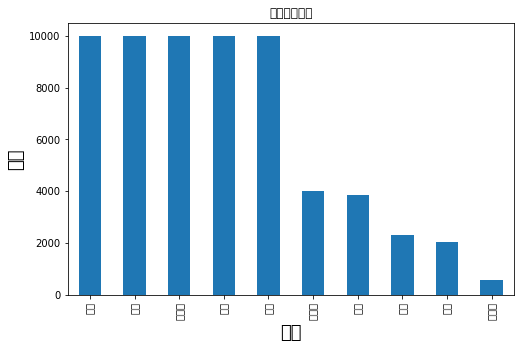

In [ ]:
df_cat.plot(x='cat', y='count', kind='bar', legend=False,  figsize=(8, 5))
plt.title("类目数量分布")
plt.ylabel('数量', fontsize=18)
plt.xlabel('类目', fontsize=18)

In [ ]:
df['cat_id'] = df['cat'].factorize()[0]
cat_id_df = df[['cat', 'cat_id']].drop_duplicates().sort_values('cat_id').reset_index(drop=True)
cat_to_id = dict(cat_id_df.values)
id_to_cat = dict(cat_id_df[['cat_id', 'cat']].values)
df.sample(10)

,cat,review,cat_id
31944,洗发水,不是标签上写洗发水80*3加护发素80*2么？怎么全是护发素？差评！！！,4
54537,酒店,"优点:1.地理位置非常好,哈尔滨有代表性的景点都是徒步就到,省去和的士司机打交道的烦恼(哈尔...",9
57526,酒店,很不错，服务和房间设施等都很好。我是端午节和女朋友一起去的，女朋友手机没电可问总台借万能充电...,9
53631,酒店,房间和设施都符合四星标准，不足方面有：1，服务水平一般2，房间里的中央空调噪音极大，像拖拉机...,9
61035,酒店,便宜，总体还行。延迟了1小时也没收额外的房费，这点不错。东楼的一楼房间很潮啊，味道很难闻，要...,9
27782,洗发水,好用，正品，购物方便，京东物流就是快！,4
49996,计算机,完美屏，打开不感觉厚，很轻巧，键盘手感好，摄像头清晰！东芝DVD，西数硬盘，45nm处理器就...,8
60748,酒店,什么玩意儿啊？三百多的住宿就这条件？这什么年代的房子了啊，真破！各种硬件设施都破的不要不要的...,9
9219,平板,平板收到了，超级不爽，包装摔成了这样，箱子里面就一个包装盒，连一点填充物都没有，幸好机子没摔坏,1
27684,洗发水,京东成了本奶妈生活便捷的一部分，但一般只选京东自营和京东超市。东西正品，售后有保证，快递给力...,4


In [ ]:
cat_id_df

,cat,cat_id
0,书籍,0
1,平板,1
2,手机,2
3,水果,3
4,洗发水,4
5,热水器,5
6,蒙牛,6
7,衣服,7
8,计算机,8
9,酒店,9


In [ ]:
#定义删除除字母,数字，汉字以外的所有符号的函数
def remove_punctuation(line):
    line = str(line)
    if line.strip()=='':
        return ''
    rule = re.compile(u"[^a-zA-Z0-9\u4E00-\u9FA5]")
    line = rule.sub('',line)
    return line

def stopwordslist(filepath):
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]
    return stopwords

#加载停用词
stopwords = stopwordslist('/content/drive/MyDrive/chineseStopWords.txt')


In [ ]:
#删除除字母,数字，汉字以外的所有符号
df['clean_review'] = df['review'].apply(remove_punctuation)
df.sample(10)

,cat,review,cat_id,clean_review
19953,水果,包装讲究，苹果完好无坏果，以后就你家购买了。手动点赞 。,3,包装讲究苹果完好无坏果以后就你家购买了手动点赞
45681,衣服,烂的没话讲了，*就当赏了,7,烂的没话讲了就当赏了
10650,平板,说实话购物不是很理想买来没开机就死机,1,说实话购物不是很理想买来没开机就死机
56585,酒店,前台客房服务态度非常好！早餐很丰富，房价很干净。再接再厉！中国人的酒店就是无烟房间少，或者把...,9,前台客房服务态度非常好早餐很丰富房价很干净再接再厉中国人的酒店就是无烟房间少或者把烟灰缸放进...
58057,酒店,根本不配四星 再也不会选择入住 住的最好的豪华楼层 房间小得出奇 也没有浴缸 入住的特殊要求...,9,根本不配四星再也不会选择入住住的最好的豪华楼层房间小得出奇也没有浴缸入住的特殊要求也没有满足...
37450,蒙牛,蒙牛！ 我是聪明的好孩子！,6,蒙牛我是聪明的好孩子
9693,平板,一天一个价，波动就是*，这种配置的平板至于用这种营销手段，莫就是宰到一个算一个,1,一天一个价波动就是这种配置的平板至于用这种营销手段莫就是宰到一个算一个
39765,衣服,裤子非常满意，真不敢相信这个价钱可以买到这么好的裤子，之前在实体店里看到的要贵好多，质量是一...,7,裤子非常满意真不敢相信这个价钱可以买到这么好的裤子之前在实体店里看到的要贵好多质量是一样的价...
36634,热水器,东西不错，装上去用了,5,东西不错装上去用了
34541,洗发水,体验感太差了，以后再也不相信京东了，直营店都卖假货欺骗老百姓，还是实体商场靠谱。这款洗发水已...,4,体验感太差了以后再也不相信京东了直营店都卖假货欺骗老百姓还是实体商场靠谱这款洗发水已经使用几...


In [ ]:
#分词，并过滤停用词
df['cut_review'] = df['clean_review'].apply(lambda x: " ".join([w for w in list(jb.cut(x)) if w not in stopwords]))
df.head()

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.896 seconds.
DEBUG:jieba:Loading model cost 0.896 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


,cat,review,cat_id,clean_review,cut_review
0,书籍,﻿做父母一定要有刘墉这样的心态，不断地学习，不断地进步，不断地给自己补充新鲜血液，让自己保持...,0,做父母一定要有刘墉这样的心态不断地学习不断地进步不断地给自己补充新鲜血液让自己保持一颗年轻的...,做 父母 一定 刘墉 心态 不断 学习 不断 进步 不断 补充 新鲜血液 保持 一颗 年轻 ...
1,书籍,作者真有英国人严谨的风格，提出观点、进行论述论证，尽管本人对物理学了解不深，但是仍然能感受到...,0,作者真有英国人严谨的风格提出观点进行论述论证尽管本人对物理学了解不深但是仍然能感受到真理的火...,作者 真有 英国人 严谨 风格 提出 观点 进行 论述 论证 物理学 了解 不深 仍然 感受...
2,书籍,作者长篇大论借用详细报告数据处理工作和计算结果支持其新观点。为什么荷兰曾经县有欧洲最高的生产...,0,作者长篇大论借用详细报告数据处理工作和计算结果支持其新观点为什么荷兰曾经县有欧洲最高的生产率...,作者 长篇大论 借用 详细 报告 数据处理 工作 计算结果 支持 其新 观点 荷兰 曾经 县...
3,书籍,作者在战几时之前用了＂拥抱＂令人叫绝．日本如果没有战败，就有会有美军的占领，没胡官僚主义的延...,0,作者在战几时之前用了拥抱令人叫绝日本如果没有战败就有会有美军的占领没胡官僚主义的延续没有战后...,作者 战 之前 拥抱 令人 叫绝 日本 没有 战败 会 美军 占领 没胡 官僚主义 延续 没...
4,书籍,作者在少年时即喜阅读，能看出他精读了无数经典，因而他有一个庞大的内心世界。他的作品最难能可贵...,0,作者在少年时即喜阅读能看出他精读了无数经典因而他有一个庞大的内心世界他的作品最难能可贵的有两...,作者 少年 时即 喜 阅读 看出 精读 无数 经典 一个 庞大 内心世界 作品 难能可贵 两...


/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 20070 (\N{CJK UNIFIED IDEOGRAPH-4E66}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 31821 (\N{CJK UNIFIED IDEOGRAPH-7C4D}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 26495 (\N{CJK UNIFIED IDEOGRAPH-677F}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 26426 (\N{CJK UNIFIED IDEOGRAPH-673A}) m

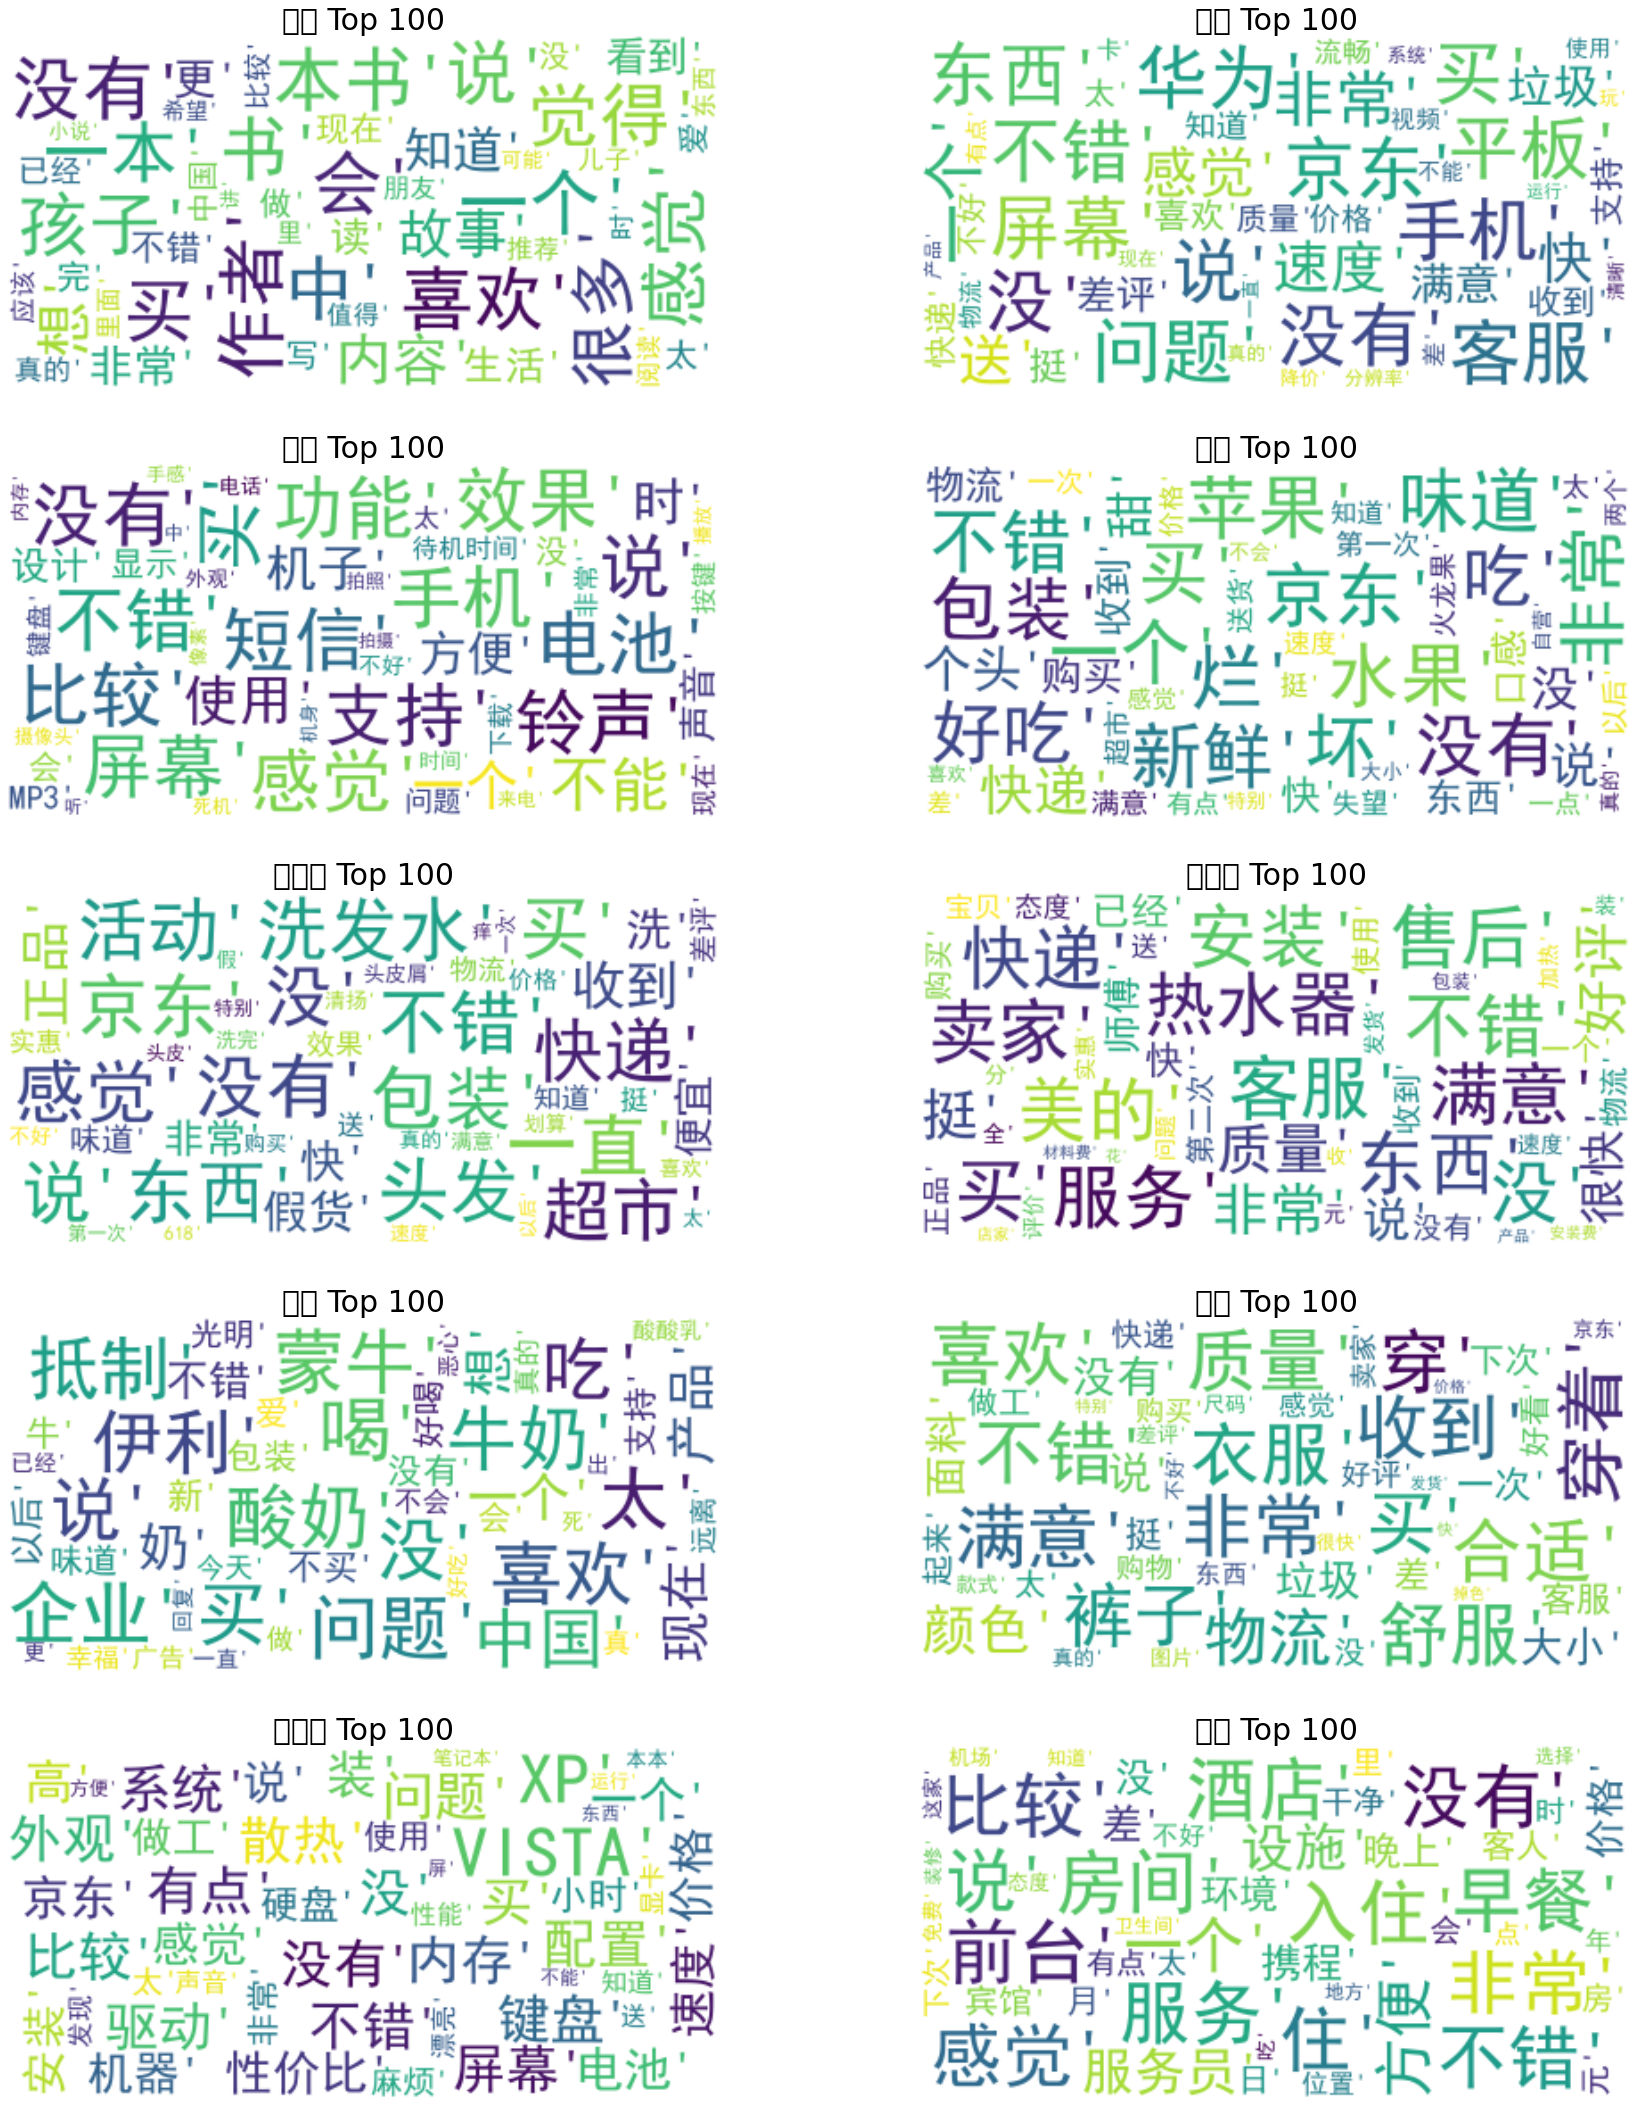

In [ ]:
import matplotlib.font_manager as fm
from collections import Counter
from wordcloud import WordCloud

def generate_wordcloud(tup):
    wordcloud = WordCloud(background_color='white',
                          font_path='/content/drive/MyDrive/SimHei.ttf',
                          max_words=50, max_font_size=40,
                          random_state=42
                         ).generate(str(tup))
    return wordcloud

cat_desc = dict()
for cat in cat_id_df.cat.values:

    text = df.loc[df['cat']==cat, 'cut_review']
    text = (' '.join(map(str,text))).split(' ')
    cat_desc[cat]=text

fig,axes = plt.subplots(5, 2, figsize=(30, 38))
k=0
for i in range(5):
    for j in range(2):
        cat = id_to_cat[k]
        most100=Counter(cat_desc[cat]).most_common(100)
        ax = axes[i, j]
        ax.imshow(generate_wordcloud(most100), interpolation="bilinear")
        ax.axis('off')
        ax.set_title("{} Top 100".format(cat), fontsize=30)
        k+=1

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(norm='l2', ngram_range=(1, 2))
features = tfidf.fit_transform(df.cut_review)
labels = df.cat_id
print(features.shape)
print('-----------------------------')
print(features)

(62773, 657425)
-----------------------------
  (0, 497792)	0.09090960029323597
  (0, 264620)	0.09090960029323597
  (0, 63747)	0.09090960029323597
  (0, 253136)	0.08766315085236828
  (0, 476337)	0.09090960029323597
  (0, 43037)	0.09090960029323597
  (0, 441652)	0.09090960029323597
  (0, 563876)	0.09090960029323597
  (0, 316272)	0.09090960029323597
  (0, 160711)	0.09090960029323597
  (0, 463741)	0.09090960029323597
  (0, 590846)	0.09090960029323597
  (0, 595464)	0.09090960029323597
  (0, 389952)	0.09090960029323597
  (0, 114982)	0.09090960029323597
  (0, 596609)	0.09090960029323597
  (0, 93443)	0.09090960029323597
  (0, 422426)	0.09090960029323597
  (0, 331091)	0.09090960029323597
  (0, 41722)	0.09090960029323597
  (0, 396321)	0.08766315085236828
  (0, 88692)	0.09090960029323597
  (0, 252029)	0.09090960029323597
  (0, 463759)	0.09090960029323597
  (0, 312828)	0.09090960029323597
  :	:
  (62772, 588048)	0.04961995242264664
  (62772, 514393)	0.029253770119525596
  (62772, 271414)	0.033984

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for cat, cat_id in sorted(cat_to_id.items()):
    features_chi2 = chi2(features, labels == cat_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(cat))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))


# '书籍':
  . Most correlated unigrams:
       . 内容
       . 本书
  . Most correlated bigrams:
       . 这是 一本
       . 喜欢 本书
# '平板':
  . Most correlated unigrams:
       . 平板
       . 华为
  . Most correlated bigrams:
       . 支持 国产
       . 支持 国货
# '手机':
  . Most correlated unigrams:
       . 铃声
       . 功能
  . Most correlated bigrams:
       . 支持 java
       . 支持 mp3
# '水果':
  . Most correlated unigrams:
       . 新鲜
       . 苹果
  . Most correlated bigrams:
       . 苹果 好吃
       . 京东 水果
# '洗发水':
  . Most correlated unigrams:
       . 头发
       . 洗发水
  . Most correlated bigrams:
       . 洗完 头发
       . 超市 便宜
# '热水器':
  . Most correlated unigrams:
       . 热水器
       . 安装
  . Most correlated bigrams:
       . 安装 使用
       . 安装 师傅
# '蒙牛':
  . Most correlated unigrams:
       . 伊利
       . 蒙牛
  . Most correlated bigrams:
       . 蒙牛 伊利
       . 抵制 蒙牛
# '衣服':
  . Most correlated unigrams:
       . 质量
       . 裤子
  . Most correlated bigrams:
       . 裤子 质量
       . 质量 不错
# '计算机':
  . Most correla

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['cut_review'], df['cat_id'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
def myPredict(sec):
    format_sec=" ".join([w for w in list(jb.cut(remove_punctuation(sec))) if w not in stopwords])
    pred_cat_id=clf.predict(count_vect.transform([format_sec]))
    print(id_to_cat[pred_cat_id[0]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

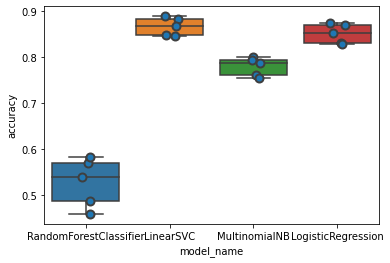

In [ ]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.867044
LogisticRegression        0.851050
MultinomialNB             0.779475
RandomForestClassifier    0.527645
Name: accuracy, dtype: float64